# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### To-Do List
* Export all plots to png in Images folder
* Include observations for each plot

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# weather api config info
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'units': 'imperial',
    'appid': weather_api_key
}

city_data_list = []

count = 0

print('-'*30)
print('Beginning Data Retrieval Process')
print('-'*30)

for city in cities:
    
    params['q'] = city
    
    try:
        
        response = requests.get(url, params = params)
        city_data_json = response.json()
        
        city_data_dict = {
            'City': city,
            'Cloudiness': city_data_json['clouds']['all'],
            'Date': city_data_json['dt'],
            'Humidity': city_data_json['main']['humidity'],
            'Lat': city_data_json['coord']['lat'],
            'Lng': city_data_json['coord']['lon'],
            'Max Temp': city_data_json['main']['temp_max'],
            'Wind Speed': city_data_json['wind']['speed']
        }
        
        city_data_list.append(city_data_dict)
        
        print(f"Gathered data for city number {count}: {city}")
        
            
    except:
        print(f"Error: Could not retrieve data for city number {count}: {city}")
    
    count += 1

print('-'*30)
print('Data Retrieval Process Done')
print('-'*30)


------------------------------
Beginning Data Retrieval Process
------------------------------
Gathered data for city number 0: cherskiy
Gathered data for city number 1: tiznit
Gathered data for city number 2: datong
Gathered data for city number 3: abu dhabi
Gathered data for city number 4: rikitea
Gathered data for city number 5: puerto ayora
Gathered data for city number 6: rocha
Error: Could not retrieve data for city number 7: barentsburg
Gathered data for city number 8: cape town
Gathered data for city number 9: hithadhoo
Gathered data for city number 10: port augusta
Gathered data for city number 11: bethel
Gathered data for city number 12: jamestown
Gathered data for city number 13: bandiagara
Gathered data for city number 14: santiago
Gathered data for city number 15: georgetown
Gathered data for city number 16: bambous virieux
Gathered data for city number 17: kapaa
Gathered data for city number 18: tarsus
Gathered data for city number 19: bluff
Gathered data for city number 

In [6]:
len(city_data_list)

551

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df = pd.DataFrame.from_dict(city_data_list)

city_data_df.index.name = 'City ID'

city_data_df.to_csv(output_data_file)

city_data_df.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,
0,cherskiy,100,1631901081,84,68.7500,161.3000,39.09,2.77
1,tiznit,0,1631901081,71,29.5833,-9.5000,69.24,7.61
2,datong,93,1631901082,74,40.0936,113.2914,62.08,4.18
3,abu dhabi,0,1631900827,59,24.4667,54.3667,95.11,5.75
4,rikitea,100,1631901082,75,-23.1203,-134.9692,68.65,3.74


In [8]:
city_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000
mean,57.406534,1.631901e+09,71.047187,21.241492,18.266394,66.738966,7.775082
std,37.985043,9.515276e+01,20.674216,33.083398,89.241654,17.584820,5.261520
min,0.000000,1.631901e+09,7.000000,-54.800000,-175.200000,13.890000,0.000000
25%,20.000000,1.631901e+09,62.000000,-6.175800,-63.797500,51.925000,3.905000
50%,70.000000,1.631901e+09,76.000000,25.519800,26.400000,71.400000,6.670000
75%,95.500000,1.631901e+09,86.000000,49.340750,89.308650,79.320000,10.805000
max,100.000000,1.631901e+09,100.000000,78.218600,179.316700,107.060000,31.520000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
sum(city_data_df['Humidity']>100)

0

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

TypeError: 'datetime.datetime' object is not subscriptable

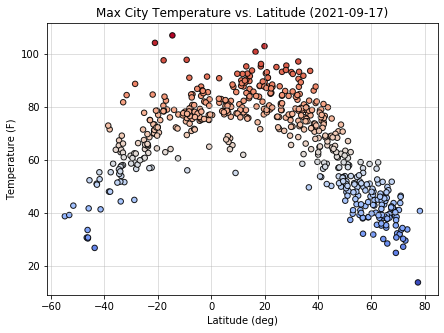

In [94]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=max_temps, c = max_temps, s=30, edgecolors='black', cmap="coolwarm", alpha=30)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Temperature (F)")

ax.set_title(f"Max City Temperature vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.show()

## Latitude vs. Humidity Plot

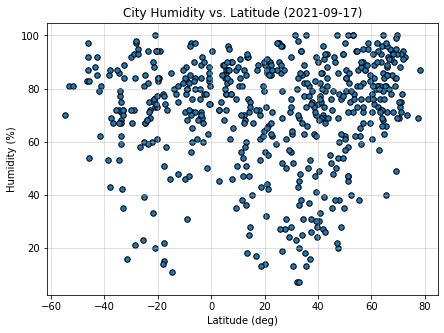

In [28]:
lats = city_data_df['Lat']
hums = city_data_df['Humidity']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=hums, s=30, edgecolors='black', alpha=1)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Humidity (%)")

ax.set_title(f"City Humidity vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.show()

## Latitude vs. Cloudiness Plot

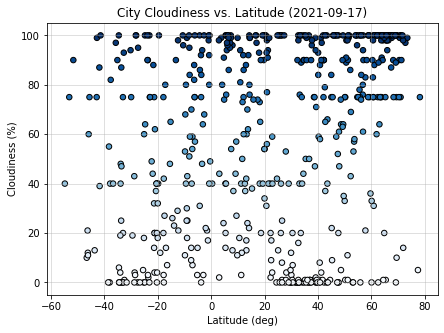

In [92]:
lats = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=clouds, c=clouds, cmap = 'Blues', s=30, edgecolors='black', alpha=1)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Cloudiness (%)")

ax.set_title(f"City Cloudiness vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.show()

## Latitude vs. Wind Speed Plot

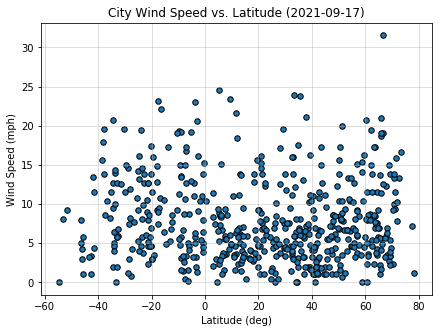

In [93]:
lats = city_data_df['Lat']
wind_s = city_data_df['Wind Speed']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=wind_s, s=30, edgecolors='black', alpha=1)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Wind Speed (mph)")

ax.set_title(f"City Wind Speed vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.show()

## Linear Regression

In [82]:
# create northern and southern hemisphere dataframes.

northern_hem_df = city_data_df[city_data_df['Lat'] > 0]
southern_hem_df = city_data_df[city_data_df['Lat'] < 0]

# plot scatter plot with linear regression and r-value
# UNFINISHED: add cmap functionality
def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title} ({date.today()})")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.849991665469665


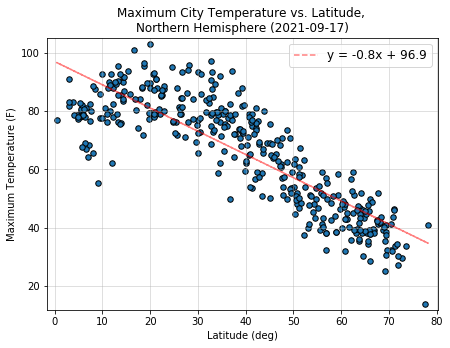

In [84]:
x = northern_hem_df['Lat']
y = northern_hem_df['Max Temp']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Maximum Temperature (F)', title = "Maximum City Temperature vs. Latitude, \nNorthern Hemisphere")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7629770075996967


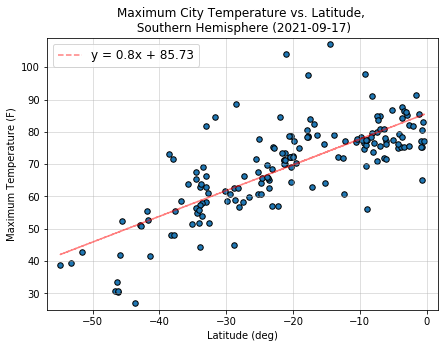

In [85]:
x = southern_hem_df['Lat']
y = southern_hem_df['Max Temp']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Maximum Temperature (F)', title = "Maximum City Temperature vs. Latitude, \n Southern Hemisphere")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18625551746873875


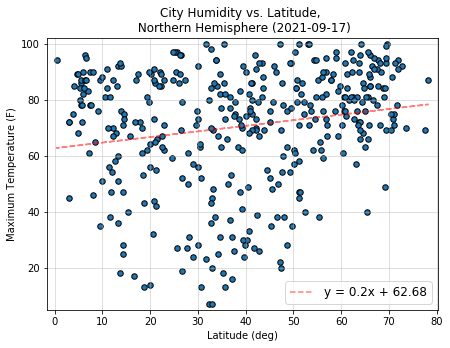

In [86]:
x = northern_hem_df['Lat']
y = northern_hem_df['Humidity']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Humidity (%)', title = "City Humidity vs. Latitude, \n Northern Hemisphere")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007750394567415317


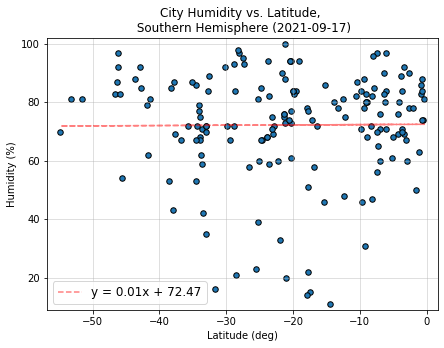

In [87]:
x = southern_hem_df['Lat']
y = southern_hem_df['Humidity']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Humidity (%)', title = "City Humidity vs. Latitude, \n Southern Hemisphere")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20134491160416404


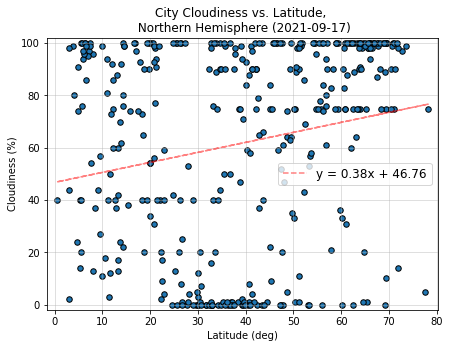

In [88]:
x = northern_hem_df['Lat']
y = northern_hem_df['Cloudiness']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Cloudiness (%)', title = "City Cloudiness vs. Latitude, \n Northern Hemisphere")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1559159880304656


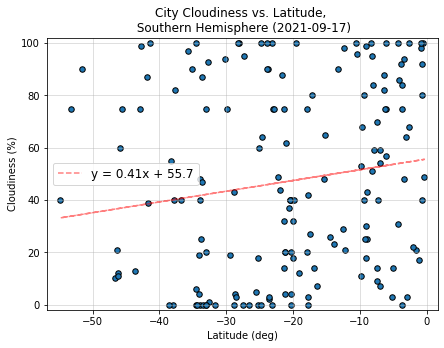

In [89]:
x = southern_hem_df['Lat']
y = southern_hem_df['Cloudiness']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Cloudiness (%)', title = "City Cloudiness vs. Latitude, \n Southern Hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12348640146506644


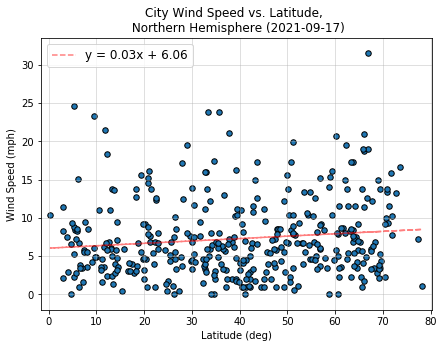

In [90]:
x = northern_hem_df['Lat']
y = northern_hem_df['Wind Speed']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Wind Speed (mph)', title = "City Wind Speed vs. Latitude, \n Northern Hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07596559658204455


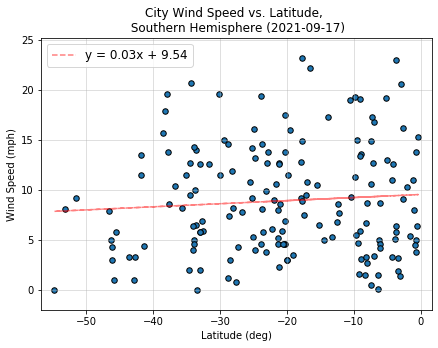

In [91]:
x = southern_hem_df['Lat']
y = southern_hem_df['Wind Speed']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Wind Speed (mph)', title = "City Wind Speed vs. Latitude, \n Southern Hemisphere")